## 讀取 txt 檔
* 請讀取 [text file](https://raw.githubusercontent.com/vashineyu/slides_and_others/master/tutorial/examples/imagenet_urls_examples.txt)
* 懶人複製連結: https://raw.githubusercontent.com/vashineyu/slides_and_others/master/tutorial/examples/imagenet_urls_examples.txt

### Hints: 使用 [Request](https://blog.gtwang.org/programming/python-requests-module-tutorial/) 抓取資料
### Hints: [字串分割](http://www.runoob.com/python/att-string-split.html)
### Hints: 例外處理: [Try-Except](https://pydoing.blogspot.com/2011/01/python-try.html)

# [作業目標]
- 試著讀取網頁上的圖片連結清單, 再以清單中網址讀取圖片

# [作業重點]
- 從網頁上讀取連結清單 (In[1], In[2])
- 從清單網址讀取圖片 (In[6]~In[9], Out[6]~Out[9])

In [195]:
## 假如我們不想把資料載到自己的電腦裡?
# 把連結填入
target_url = "https://raw.githubusercontent.com/vashineyu/slides_and_others/master/tutorial/examples/imagenet_urls_examples.txt"

In [196]:
import requests

# 使用 GET 方式下載普通網頁
response = requests.get(target_url)
# 檢查狀態碼是否 OK
if response.status_code == requests.codes.ok:
    print("OK")

# 輸出網頁 HTML 原始碼
data = response.text

# 用 request 傳送回來的資料不會認得斷行符號
print(len(data))
data[0:100]

OK
784594


'n00015388_157\thttp://farm1.static.flickr.com/145/430300483_21e993670c.jpg\nn00015388_238\thttp://farm2'

In [197]:
# 找到換行符號，用該符號做字串分割後，把它拿掉
split_tag = "\n"

data = data.split(split_tag)
print(len(data))

# 確認是否與網頁原始碼一致,分別列出幾個求證
data[0]
#data[1]

9996


'n00015388_157\thttp://farm1.static.flickr.com/145/430300483_21e993670c.jpg'

## 將 txt 轉成 pandas dataframe

In [200]:
import pandas as pd

# 此In[25]有問題
arrange_data = []
with open("D:/Downloads/Part01/imagenet_urls_examples.txt", encoding="utf-8") as f:
    for line in f:
        # 先處理\t, 置換成','斷開
        line = line.replace('\t', ',')
        # 將每句最後的 /n 取代成空值後，再以','斷句
        line = line.replace('\n', '').split(',') 
        arrange_data.append(line)
arrange_data
    
df = pd.DataFrame(arrange_data, dtype=object)
df.head()

,0,1,2,3,4
0,n00015388_157,http://farm1.static.flickr.com/145/430300483_2...,None,None,None
1,n00015388_238,http://farm2.static.flickr.com/1005/3352960681...,None,None,None
2,n00015388_304,http://farm1.static.flickr.com/27/51009336_a96...,None,None,None
3,n00015388_327,http://farm4.static.flickr.com/3025/2444687979...,None,None,None
4,n00015388_355,http://img100.imageshack.us/img100/3253/forres...,None,None,None


## 讀取圖片，請讀取上面 data frame 中的前 5 張圖片

http://farm1.static.flickr.com/145/430300483_21e993670c.jpg


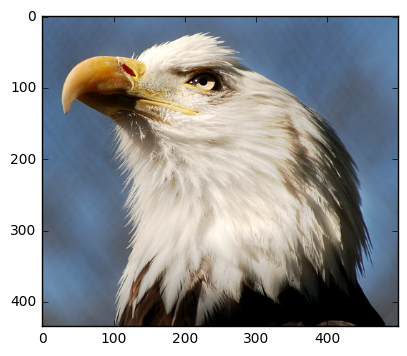

In [219]:
from PIL import Image
from io import BytesIO
import numpy as np
import matplotlib.pyplot as plt


# 確認dataframe裡的None
#pd.isnull(df) # 方法1
cols = df.columns[df.isnull().any()] # 方法2

# 以下方法皆無法刪除存在None的列或行( ?? )
#df.dropna()
#df.dropna(axis=1, how='any')
#df.mask(df.eq('None')).dropna()
#df.mask(df.astype(object).eq('None')).dropna()
#df = df.replace(to_replace='None', value=np.nan).dropna()

# 直接指定列刪除
df = df.drop(cols, axis=1)


# 給予new dataframe加入columns
df.columns = ["id", "link"]
#df.head()

# 請用 df.loc[...] 得到第一筆資料的連結
first_link = df.loc[0,'link']
print(first_link)


# 使用 GET 方式取得連結
response = requests.get(first_link)
# 將連結裡的圖像存至img
img = Image.open(BytesIO(response.content))

# Convert img to numpy array
plt.imshow(img)
plt.show()

In [226]:
def img2arr_fromURLs(url_list, resize = False):
    """
    請完成這個 Function
    Args
        - url_list: list of URLs
        - resize: bool
    Return
        - list of array
    """
    img_list=[]
    
    # url_list為一次5個連結, 所以需要輪詢讀取
    for url in url_list:
        # 使用 GET 方式獲得連結
        response = requests.get(url)
        # 因為有些連結壞掉, 所以壞掉的pass
        try:
            # 將連結裡的圖像存至img
            img=Image.open(BytesIO(response.content))
        except :
            pass
        else:
            # ok的放到array裡
            img_list.append(img)
            print(img)
    
    
    return img_list

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=499x435 at 0x22FCA26E3C8>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x322 at 0x22FCA26EA20>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=375x500 at 0x22FCA26E320>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375 at 0x22FCA291CF8>
Total images that we got: 4 


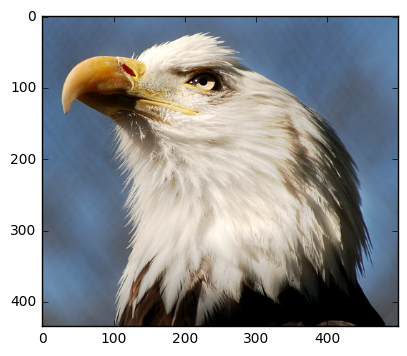

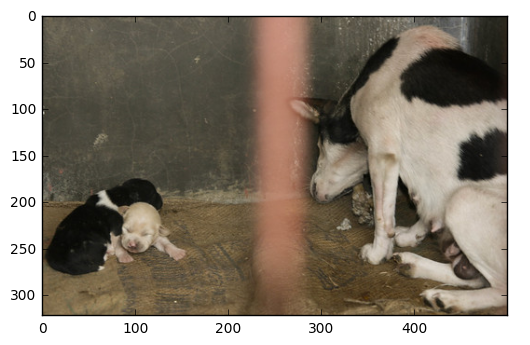

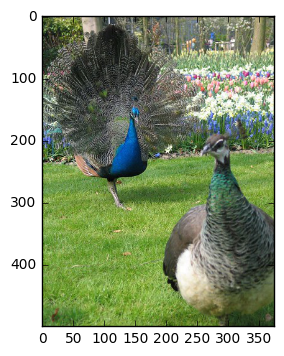

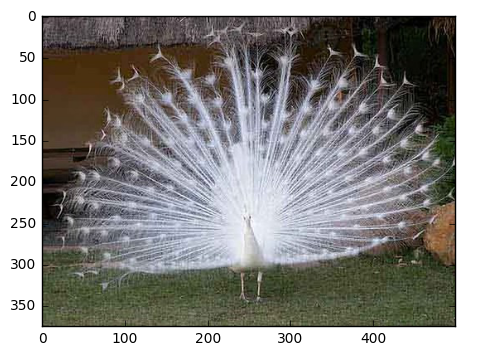

In [227]:
"""
試著讀取網頁上的圖片連結清單, 再以清單中網址讀取圖片
"""


# 讀取網頁上的圖片連結1~5
result = img2arr_fromURLs(df[0:5]['link'].values)

# 印出成功獲得連結的圖片數量
print("Total images that we got: %i " % len(result)) # 如果不等於 5, 代表有些連結失效囉

for im_get in result:
    plt.imshow(im_get)
    plt.show()